# California Traffic Accidents Analysis
### Group Members: Shawn Prasad, Blasius Boniarga, Heral Kumar, Vivaan Jhaveri
---

## Introduction

The initial dataset used in this analysis is the **US Accidents dataset** available on [Kaggle](https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents). In our analysis, we will be focusing on a sampled dataset of traffic accidents in California. The dataset, stored in the file `cali_accidents_sampled.csv`, comprises of around 113,000 accident records. These sources include traffic sensors, law enforcement reports, and weather stations, ensuring a comprehensive record of accident events.

### Background and Context

Traffic accidents pose a significant public safety challenge, particularly in busy regions such as California. By understanding when and where these accidents occur and analyzing their severity, decision-makers can design more effective strategies for emergency response and road safety improvement.

### Motivation for Analysis

The key motivations behind this analysis are:
- **Localized Insights:** Focusing on California allows us to obtain region-specific insights that can lead to targeted interventions.
- **Temporal Patterns:** Investigating the trends over time helps identify any seasonal or periodic fluctuations in accident occurrences.
- **Severity Distribution:** Evaluating accident severity levels aids in distinguishing between minor incidents and those requiring urgent attention.
- **Data-Driven Policy:** The insights derived can support resource allocation, preventive measures, and policy development aimed at reducing traffic accidents.

### Variables Overview

Key variables included in the dataset are:
- **Start_Time:** The timestamp indicating when the accident occurred.
- **Severity:** A numerical indicator of how severe the accident was.
- **City/State:** Geographic identifiers for locating the accident.
- **Weather Conditions:** Variables capturing weather information (e.g., temperature, precipitation) at the time of the accident.
- **Additional Attributes:** Other contextual factors such as road conditions, intersection details, or any special circumstances surrounding the accident.

The following sections describe the data cleaning procedures, the applied transformations, and provide comprehensive visualizations that facilitate an in-depth exploratory analysis of the dataset.

In [12]:
# Load necessary libraries
library(dplyr)
library(ggplot2)
library(lubridate)
library(readr)

# Load the California traffic accident dataset
california_data <- read_csv("data/cali_accidents_sampled.csv")

# Display the head and summary of the dataset to understand its contents
head(california_data)

Rows: 113274 Columns: 46
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (17): ID, Source, Description, Street, City, County, State, Zipcode, Co...
dbl  (13): Severity, Start_Lat, Start_Lng, End_Lat, End_Lng, Distance(mi), T...
lgl  (13): Amenity, Bump, Crossing, Give_Way, Junction, No_Exit, Railway, Ro...
dttm  (3): Start_Time, End_Time, Weather_Timestamp

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
<chr>,<chr>,<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>
A-5006183,Source1,2,2022-08-20 13:13:00,2022-08-20 15:22:45,34.66119,-120.4928,34.66119,-120.4924,0.022,...,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,Day,Day,Day,Day
A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.39548,-118.9852,35.39548,-118.9860,0.046,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,Night,Night,Night,Night
A-4535214,Source1,2,2022-02-18 16:53:00,2022-02-18 18:59:00,32.77164,-117.1614,32.73086,-117.1547,2.845,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,Day,Day,Day,Day
A-1506844,Source3,2,2020-06-15 08:17:29,2020-06-15 08:47:18,34.24327,-118.4245,NA,NA,0.000,...,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,Day,Day,Day,Day
A-3983218,Source1,2,2022-03-22 07:22:30,2022-03-22 11:12:00,33.12097,-117.3215,33.10005,-117.3086,1.626,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,Day,Day,Day,Day
A-19908,Source2,2,2016-09-13 22:15:22,2016-09-13 22:45:22,38.65413,-121.3829,NA,NA,0.000,...,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,Night,Night,Night,Night


In [13]:
summary(california_data)

      ID               Source             Severity    
 Length:113274      Length:113274      Min.   :1.000  
 Class :character   Class :character   1st Qu.:2.000  
 Mode  :character   Mode  :character   Median :2.000  
                                       Mean   :2.166  
                                       3rd Qu.:2.000  
                                       Max.   :4.000  
                                                      
   Start_Time                        End_Time                     
 Min.   :2016-03-22 21:28:47.00   Min.   :2016-03-22 22:58:47.00  
 1st Qu.:2018-11-18 08:37:47.00   1st Qu.:2018-11-18 09:22:22.00  
 Median :2020-11-07 16:54:45.00   Median :2020-11-07 19:07:37.50  
 Mean   :2020-05-18 06:54:58.22   Mean   :2020-05-18 08:56:58.30  
 3rd Qu.:2022-01-21 03:59:35.00   3rd Qu.:2022-01-21 04:46:40.25  
 Max.   :2023-03-31 21:53:00.00   Max.   :2023-03-31 23:58:00.00  
                                                                  
   Start_Lat       Start

### POSIX Time Conversion

For accurate temporal analysis, we must convert the `Start_Time` and `End_Time` columns into proper date-time objects. This conversion enables us to compute time differences (such as accident duration) and perform time series analyses. Additionally, we will create a new variable, `Month`, by extracting the month from `Start_Time` to help us identify temporal trends.

In [14]:
# Convert Start_Time and End_Time to POSIXct objects using the specified format
california_data$Start_Time <- as.POSIXct(california_data$Start_Time, format = "%Y-%m-%d %H:%M:%S")
california_data$End_Time   <- as.POSIXct(california_data$End_Time, format = "%Y-%m-%d %H:%M:%S")

# Calculate the duration of each california_data in seconds
california_data$duration <- as.numeric(difftime(california_data$End_Time, california_data$Start_Time, units = "secs"))

# Create a new column 'Month' by extracting the month from Start_Time
california_data <- california_data %>% mutate(Month = floor_date(Start_Time, "month"))

# Verify the changes by viewing the first few rows of the dataset
head(california_data)

ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,duration,Month
<chr>,<chr>,<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dttm>
A-5006183,Source1,2,2022-08-20 13:13:00,2022-08-20 15:22:45,34.66119,-120.4928,34.66119,-120.4924,0.022,...,FALSE,FALSE,TRUE,FALSE,Day,Day,Day,Day,7785,2022-08-01
A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.39548,-118.9852,35.39548,-118.9860,0.046,...,FALSE,FALSE,FALSE,FALSE,Night,Night,Night,Night,8829,2020-12-01
A-4535214,Source1,2,2022-02-18 16:53:00,2022-02-18 18:59:00,32.77164,-117.1614,32.73086,-117.1547,2.845,...,FALSE,FALSE,FALSE,FALSE,Day,Day,Day,Day,7560,2022-02-01
A-1506844,Source3,2,2020-06-15 08:17:29,2020-06-15 08:47:18,34.24327,-118.4245,NA,NA,0.000,...,TRUE,FALSE,FALSE,FALSE,Day,Day,Day,Day,1789,2020-06-01
A-3983218,Source1,2,2022-03-22 07:22:30,2022-03-22 11:12:00,33.12097,-117.3215,33.10005,-117.3086,1.626,...,FALSE,FALSE,FALSE,FALSE,Day,Day,Day,Day,13770,2022-03-01
A-19908,Source2,2,2016-09-13 22:15:22,2016-09-13 22:45:22,38.65413,-121.3829,NA,NA,0.000,...,FALSE,FALSE,TRUE,FALSE,Night,Night,Night,Night,1800,2016-09-01


## Exploratory Data Analysis (EDA)

With the data cleaned and time variables properly converted, we now proceed to explore the dataset. In this section, we will:
- Examine summary statistics and visualize the distribution of accident duration.
- Analyze temporal trends by aggregating accidents on a monthly basis.
- Investigate the distribution of accident severity (if available).

These visualizations help reveal underlying trends and potential outliers that may require further investigation.

In [16]:
# 1. Summary Statistics for Accident Duration
duration_summary <- summary(california_data$duration)
print("Summary Statistics for Accident Duration (in seconds):")
print(duration_summary)

[1] "Summary Statistics for Accident Duration (in seconds):"
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
     330     2009     4592     7320     7853 31535999 


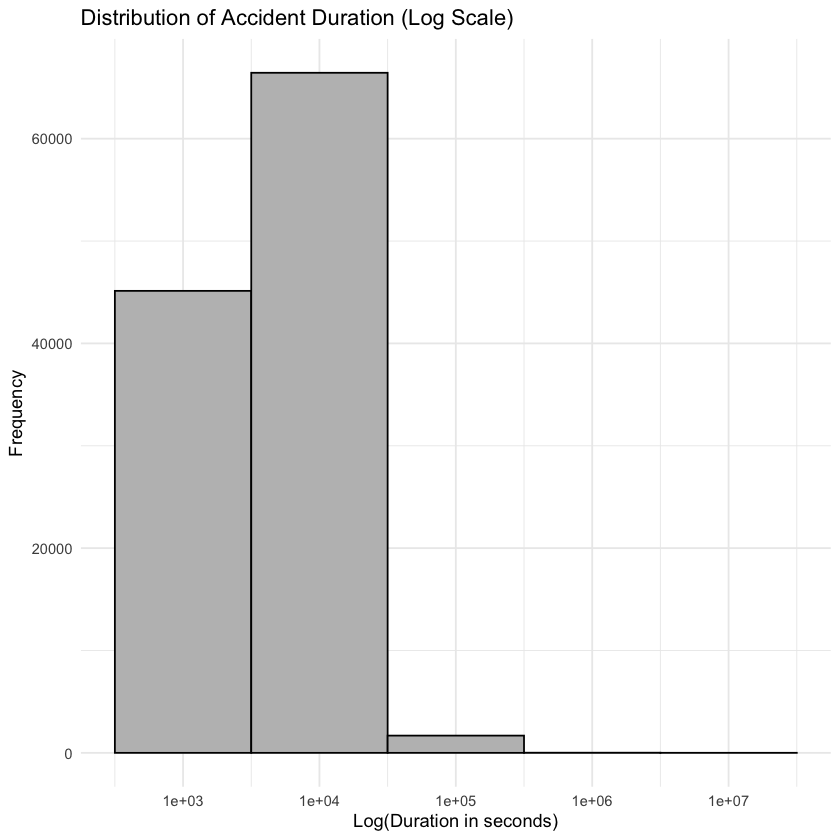

In [ ]:
# Histogram of Accident Duration (log scale)
# Note: The histogram is plotted on a log scale to better visualize the distribution for long-duration accidents.

ggplot(california_data, aes(x = duration)) +
  geom_histogram(binwidth = 1, fill = "gray", color = "black") +
  scale_x_log10() +
  labs(
    title = "Distribution of Accident Duration (Log Scale)",
    x = "Log(Duration in seconds)",
    y = "Frequency"
  ) +
  theme_minimal()

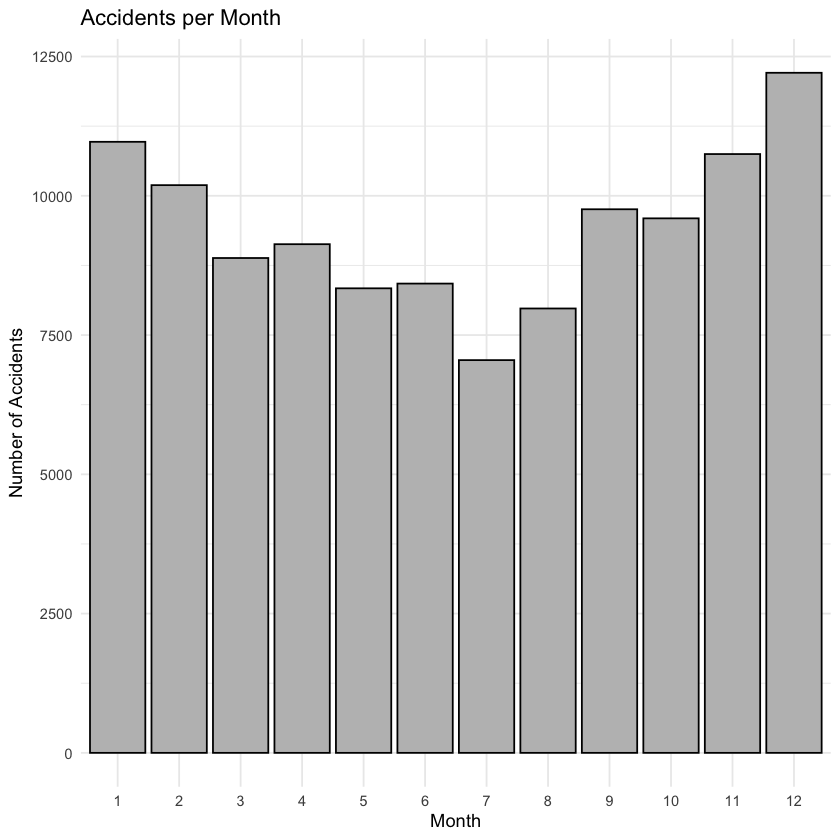

In [23]:
# Extract the month from the Start_Time
california_data$Month <- as.numeric(format(california_data$Start_Time, "%m"))

# Plot number of accidents per month
ggplot(california_data, aes(x = factor(Month))) +
  geom_bar(fill = "gray", color = "black") +
  labs(title = "Accidents per Month",
       x = "Month",
       y = "Number of Accidents") +
  theme_minimal()

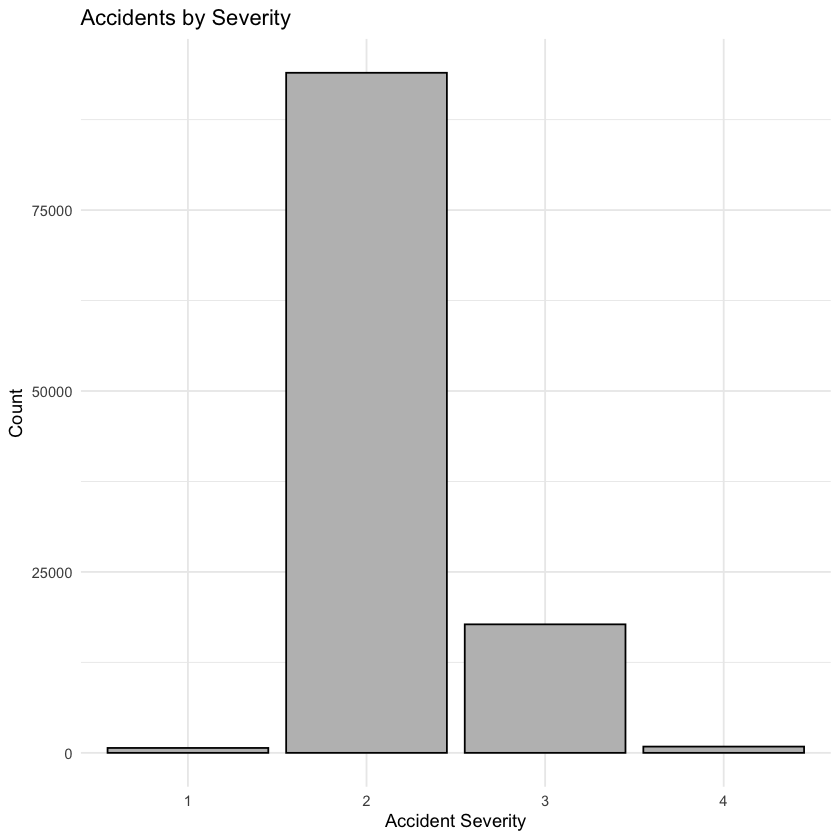

In [32]:
ggplot(california_data, aes(x = factor(Severity))) +
  geom_bar(fill = "gray", color = "black") +
  labs(title = "Accidents by Severity",
       x = "Accident Severity",
       y = "Count") +
  theme_minimal()